# Sublinear Domination and Core-periphery Structure : Supplementary Material

We first perform the necessary imports.

In [ ]:
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm


sns.set_theme()

LARGE_SIZE = 16
plt.rc('axes', labelsize=LARGE_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## IGAM/IGAM2 Model

We now present the implementation for generating instances of the IGAM model. More specifically, the `generate_igam2` function is responsible for generating IGAM2 instances with

* height $H$
* core height $H_0 < H$
* fanout $b \in \mathbb Z_{\ge 2}$
* Scale parameters $c_1, c_2$ with $1 < c_1 < c_2 < b$. 

The law for generating the **IGAM2** model is given as

\begin{equation*}
    g(u, v) = \begin{cases}
        c_2^{-1-\min \{h(u), h(v) \}} & \max \{ h(u), h(v) \} > H_0 \\
        c_1^{-1-\min \{ h(u), h(v) \} } & \max \{ h(u), h(v) \} \le H_0 \\
    \end{cases}
\end{equation*}

Letting $c_1 = c_2$ the parameter $H_0$ becomes redundant and the law reduces to the **IGAM** law of edge generation

\begin{equation*}
  f(u, v) = c^{-1-\min \{ h(u), h(v) \}}
\end{equation*}

Below we give a plot of IGAM with parameters $H = 5$, $b = 2$ and $c = c_1 = c_2 = 1.5$. We also give plots of the pagerank vector computed for the particular instance with values sorted in ascending order.

In [ ]:
def generate_igam2(H=5, b=2, c1=1.5, c2=1.5, H0=2):
  G = nx.generators.classic.balanced_tree(r=b, h=H)
  n_i = b**H
  temp = np.log(b / c1)

  black = collections.defaultdict(bool)
  x_axis, y_axis = [], []
  edges_int = list(G.edges())
  edges_rnd = []
  nodelist = collections.defaultdict(list)

  height_histogram = np.zeros(H + 1)

  for u in G:
    for v in reversed(list(G.nodes())):
      hu = np.floor(np.log(u + 1) / np.log(b))
      hv = np.floor(np.log(v + 1) / np.log(b))
      un = np.random.uniform(low=0, high=1)
      nodelist[int(hu)].append(u)
      min_h = min(hu, hv)
      max_h = max(hu, hv)
      if max_h <= H0 + 1:
        if un <= c1**(-1 - min_h):
          G.add_edge(u, v)
          edges_rnd.append((u, v))
          height_histogram[int(hu)] += 1
          height_histogram[int(hv)] += 1
      else:
        if un <= c2**(-1 - min_h):
          G.add_edge(u, v)
          edges_rnd.append((u, v))
          height_histogram[int(hu)] += 1
          height_histogram[int(hv)] += 1

  G.remove_edges_from(edges_int)

  for u in G:
    black[u] = True
    for v in G.neighbors(u):
      black[v] = True
      x_axis.append((u + 1) / len(G) * 100)
      y_axis.append(len(black) / len(G) * 100)

  x_axis = np.array(x_axis)
  y_axis = np.array(y_axis)

  return G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i

def plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix=''):
  plt.figure(figsize=(8, 8))
  plt.title('Domination Curve')
  plt.ylabel('Percentage of dominated external nodes (linear)')
  plt.xlabel('Percentage of internal nodes included by order of height (log)')
  plt.plot(x_axis, y_axis)
  plt.savefig('iga_curve_general{}.jpg'.format(suffix))
  plt.savefig('iga_curve_general{}.eps'.format(suffix), format='eps')


  plt.figure()
  rank_range = np.arange(H + 1)
  height_histogram = np.log(height_histogram)
  plt.plot(rank_range, height_histogram, linewidth=0, marker='x', color='r', label='Empirical Frequencies')
  plt.xlabel('Height')
  plt.ylabel('Number of Edges')
  p = np.polyfit(rank_range, height_histogram, deg=1)
  plt.plot(rank_range, p[0] * rank_range + p[1], label='$ y = {} x + {}$'.format(round(p[0], 2), round(p[1], 2)))
  plt.legend()

  print('Diameter:', nx.diameter(G))
  print('Theoretical Diameter:', np.log(b) / np.log(b/c2))
 
  fig, ax = plt.subplots(1, 1, figsize=(15, 15))
  pos = nx.shell_layout(G)
  for h, nodes in nodelist.items():
    nx.draw_networkx_nodes(G, nodelist=nodes + [0], ax=ax, pos=pos, node_color='b', node_size=50, alpha=(h / H))

  nx.draw_networkx_edges(G, edgelist=G.edges(), edge_color='r', pos=pos, alpha=0.3)
  plt.savefig('iga_general{}.jpg'.format(suffix))

  pr = nx.pagerank_numpy(G)
  pr_values = np.array(list(pr.values()))[:, np.newaxis].T
  sorted_pr_values = np.sort(pr_values)
  plt.figure(figsize=(30, 10))
  plt.imshow(sorted_pr_values)

  plt.figure(figsize=(10, 10))
  plt.imshow(nx.to_numpy_array(G))
  plt.savefig('igam2_adj{}.jpg'.format(suffix))

Diameter: 2
Theoretical Diameter: 2.4094208396532095


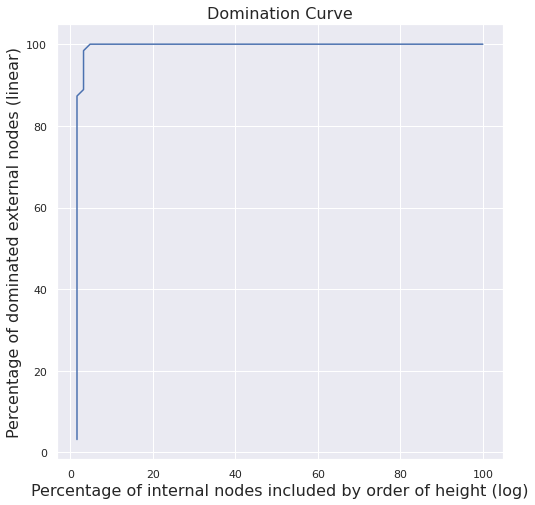

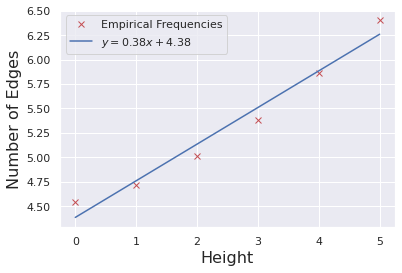

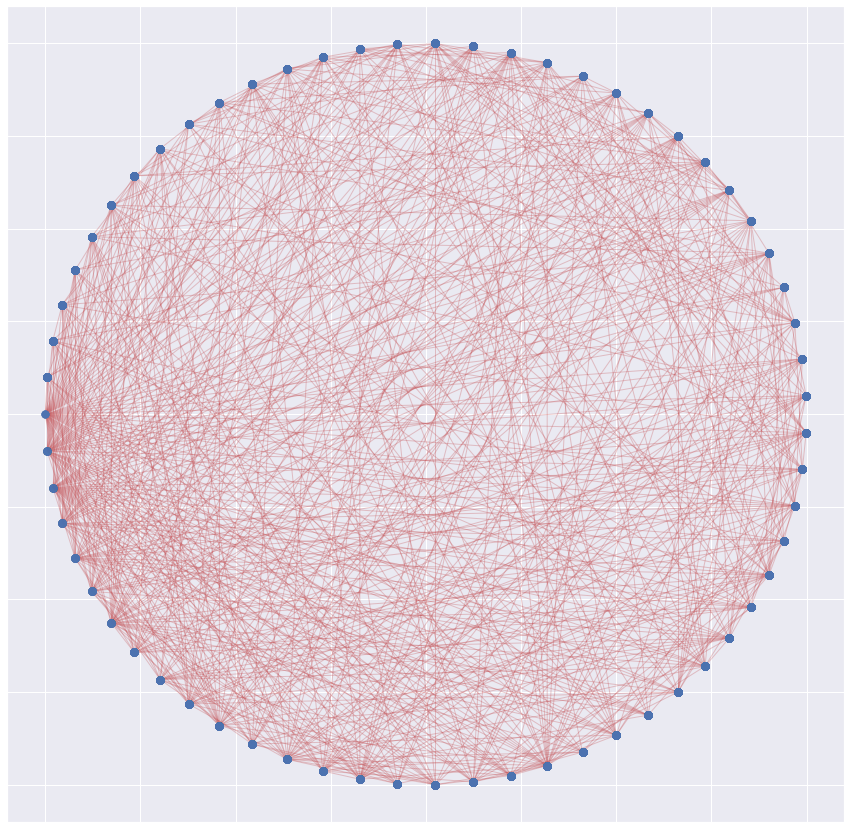

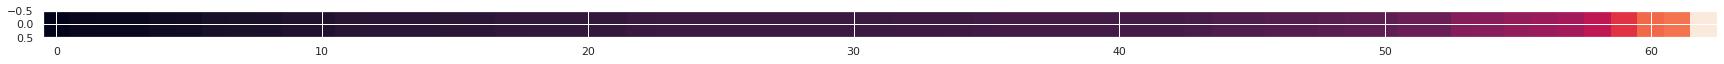

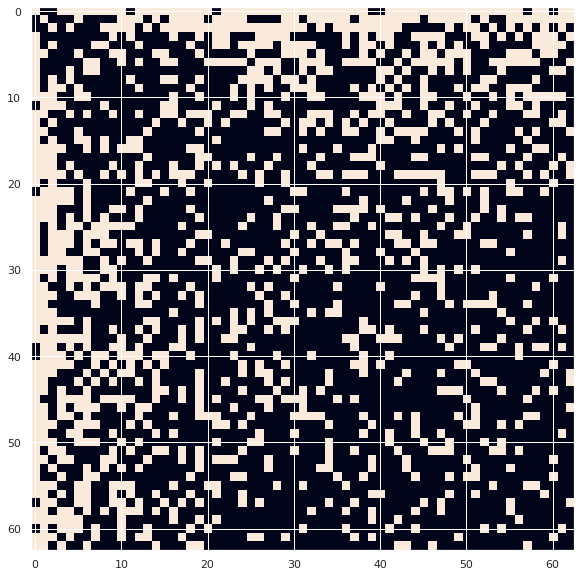

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2()
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

Diameter: 3
Theoretical Diameter: 2.4094208396532095


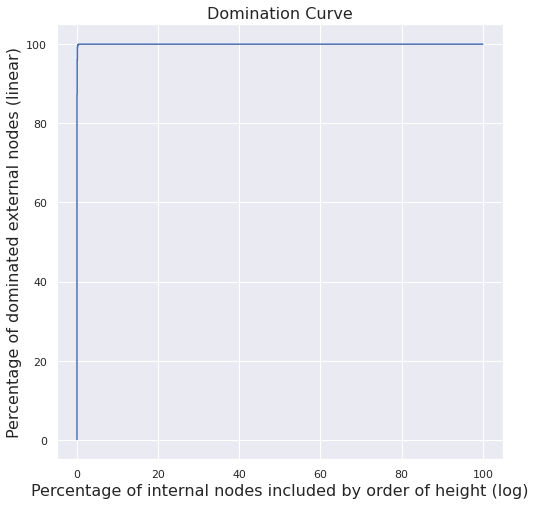

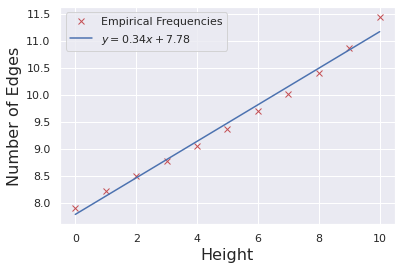

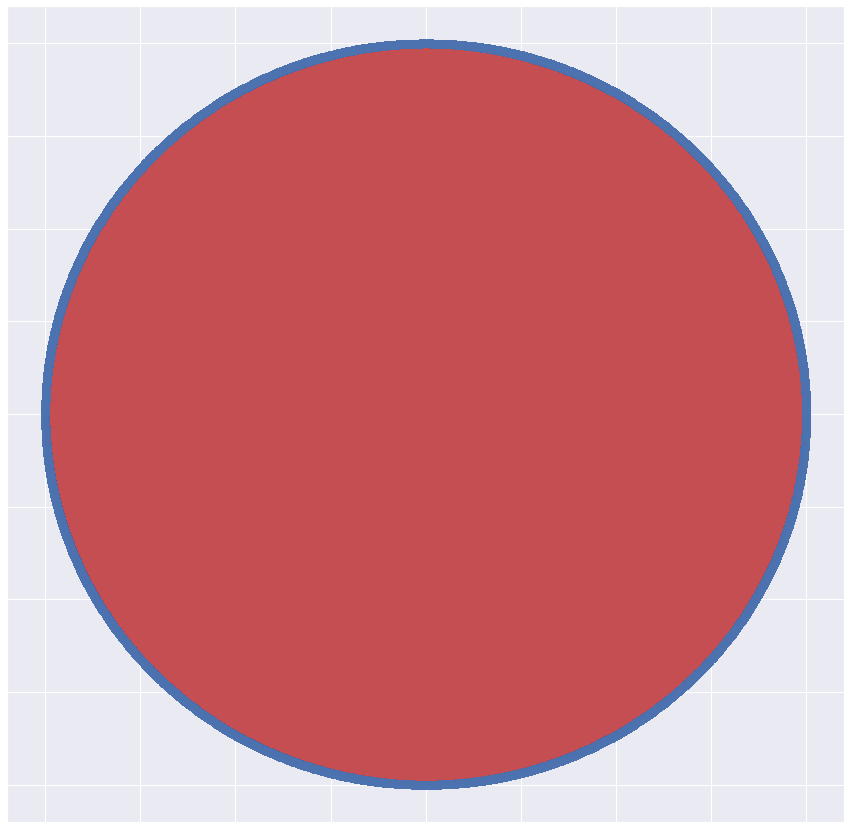

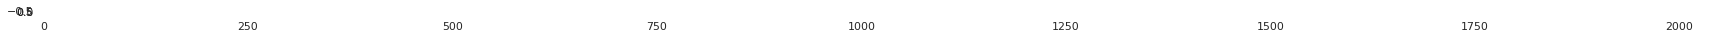

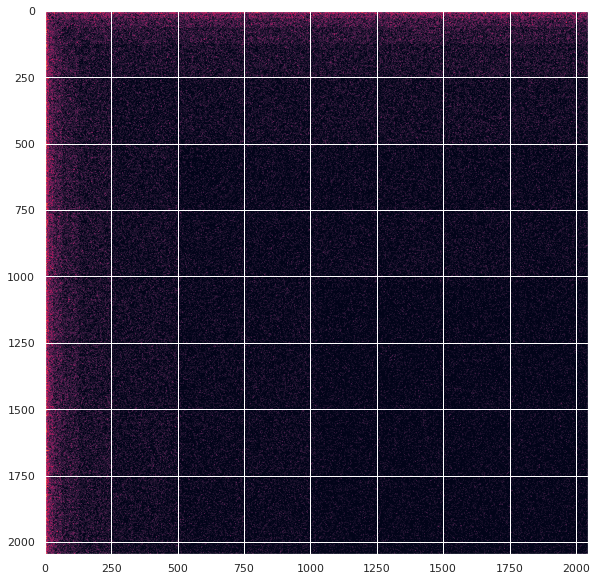

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2(H=10, b=2, c1=1.5, c2=1.5)
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

We also give a plot of IGAM2 with $b = 3$, $H = 6$, $H_0 = 2$, $c_1 = 1.5$ and $c_2 = 2.5$. The core-periphery pattern is evident by observing the adjacency matrix plot.

Diameter: 3
Theoretical Diameter: 6.025685102665476


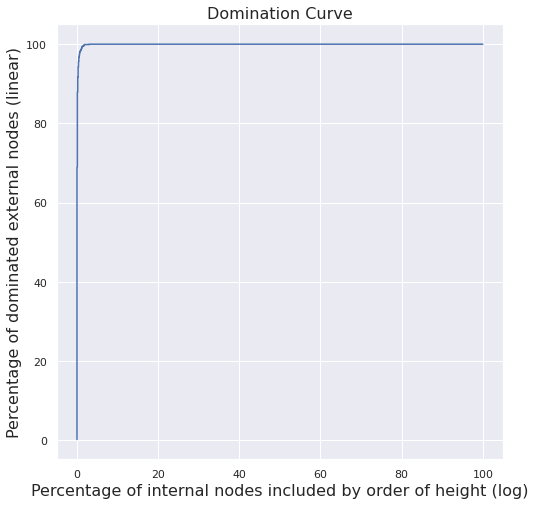

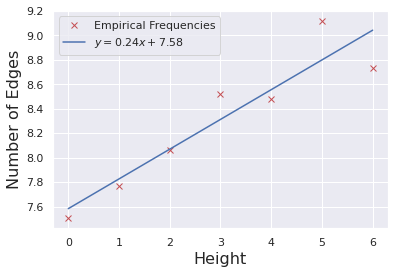

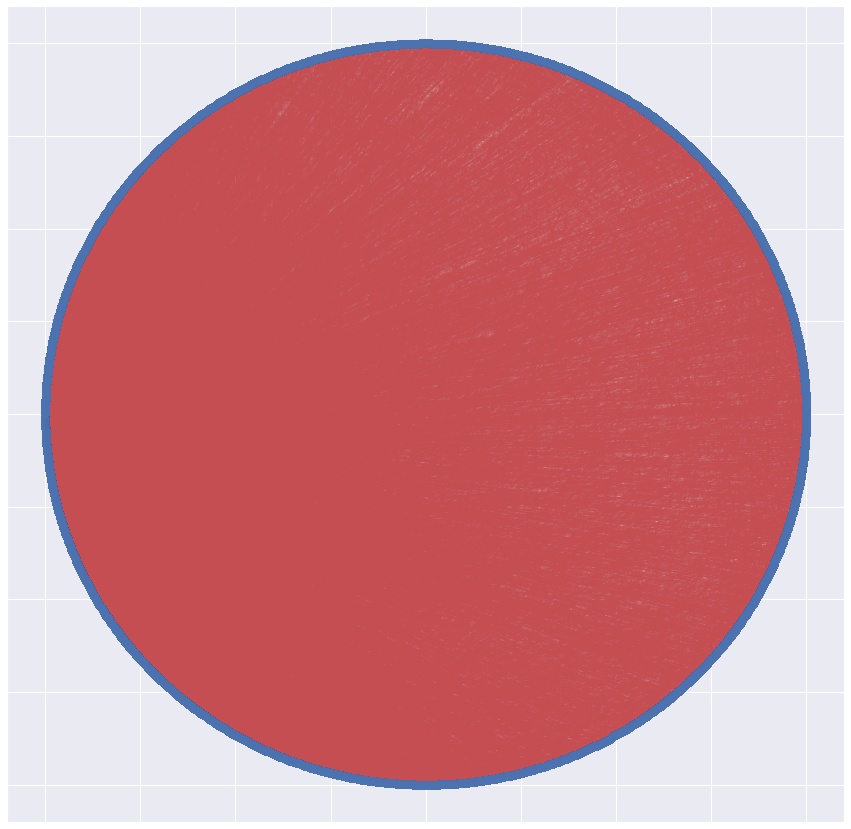

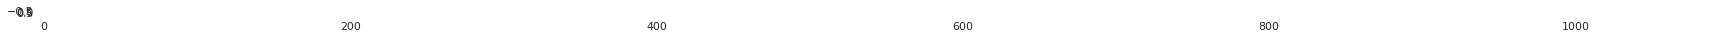

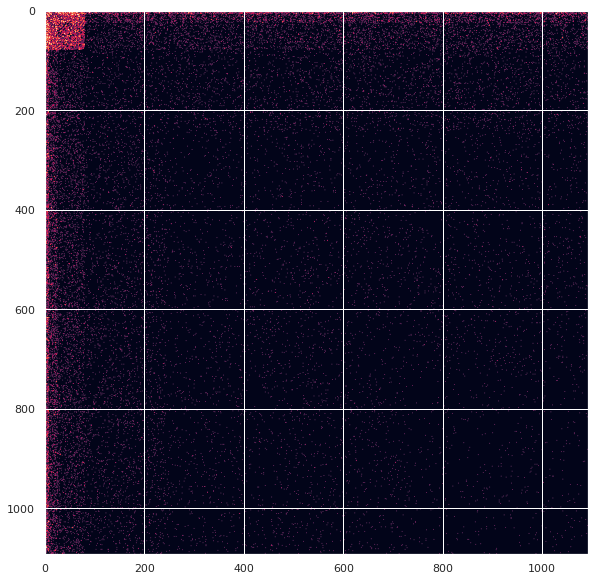

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2(H=6, b=3, c1=1.5, c2=2.5, H0=2)
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

## Average degree of IGAM

We provide plots of the average degree distribution of the IGAM model. We remind that the average degree at height $h$ is given as

\begin{equation*}
\begin{split}
    \bar d_h & \approx \sum_{r = 0}^H b^r c^{-\min \{ h, r \} - 1} \\
    % & = \frac 1 c \left [ \sum_{r = 0}^h (b / c)^r + \frac {1} {c^h} \sum_{r = h + 1}^H b^r \right ] \\
    & =  \frac 1 c \left [ \left ( \frac b c \right )^{h + 1} - 1 + \frac {b^{H + 1} - b^{h + 1}} {c^h} \right ] . 
\end{split}
\end{equation*}

We give a plot of $\log \bar d_h$ and observe that it is an almost linear function.

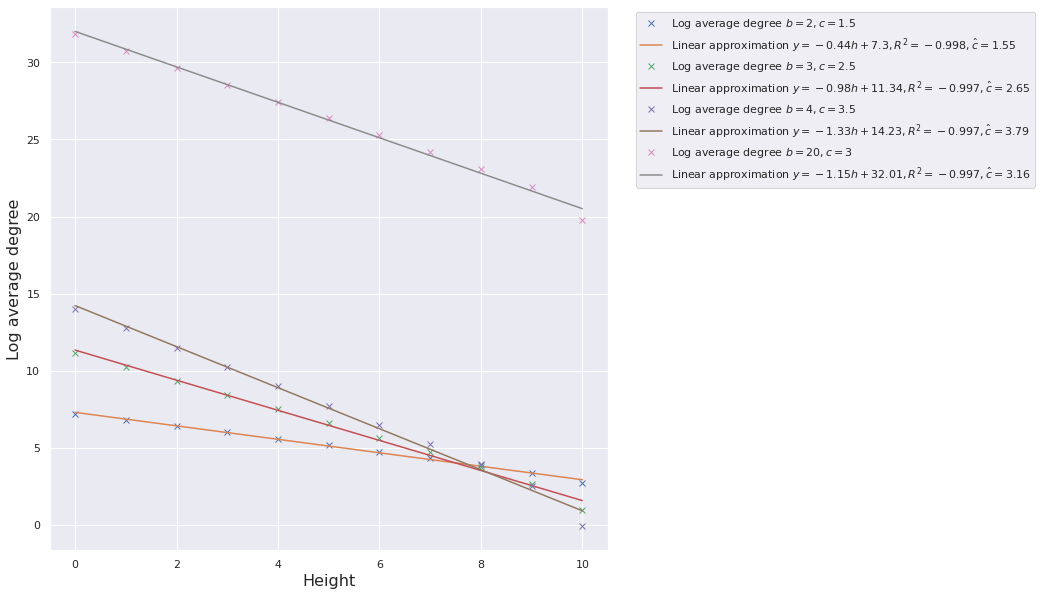

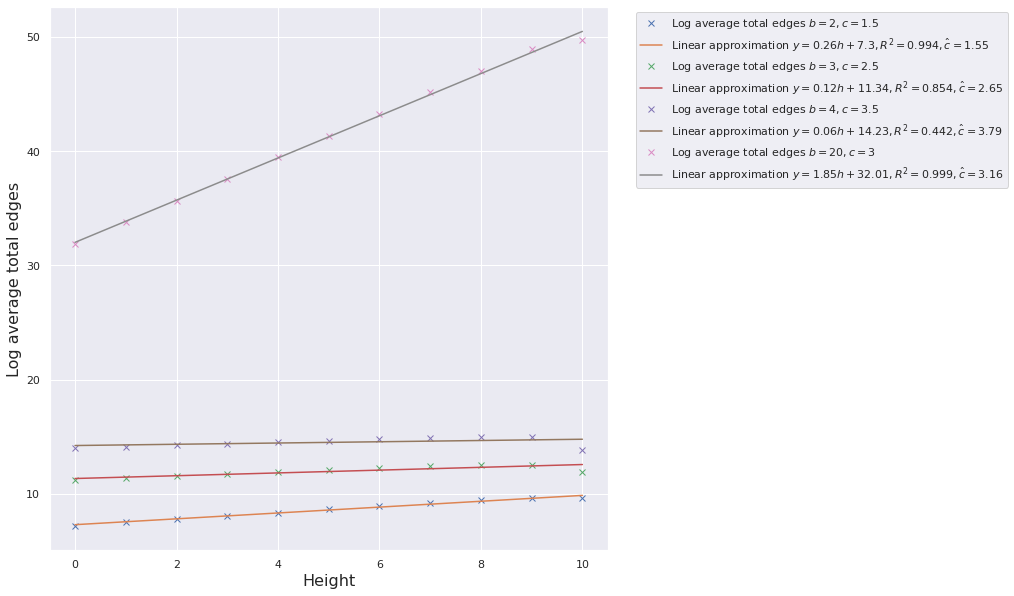

In [ ]:
def plot_average_degree(H, b, c, new_figure=False, total_edges=False):

  h = np.arange(H + 1)

  d_h = 1 / c * ((b / c)**(h + 1) - 1 + (b**(H + 1) - b**(h + 1)) / c**h )
  if total_edges:
    d_h = d_h * b**h

  log_d_h = np.log(d_h)
  r2 = np.corrcoef(h, log_d_h)[0, 1]

  p = np.polyfit(h, log_d_h, deg=1)

  y = p[0] * h + p[1]
  if total_edges:
    hat_c = b * np.exp(-p[0])
  else:
    hat_c = np.exp(-p[0])

  if new_figure:
    plt.figure()
  plt.plot(h, log_d_h, linewidth=0, marker='x', label='Log average {} $b = {}, c = {}$'.format('degree' if not total_edges else 'total edges', b, c))
  plt.plot(h, y, label='Linear approximation $y = {} h + {}, R^2 = {}, \hat c = {}$'.format(round(p[0], 2), round(p[1], 2), round(r2, 3), round(hat_c, 2)))

  plt.xlabel('Height')
  plt.ylabel('Log average {}'.format('degree' if not total_edges else 'total edges'))

  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.figure(figsize=(10, 10))
plot_average_degree(H=10, b=2, c=1.5)
plot_average_degree(H=10, b=3, c=2.5)
plot_average_degree(H=10, b=4, c=3.5)
plot_average_degree(H=10, b=20, c=3)

plt.figure(figsize=(10, 10))
plot_average_degree(H=10, b=2, c=1.5, total_edges=True)
plot_average_degree(H=10, b=3, c=2.5, total_edges=True)
plot_average_degree(H=10, b=4, c=3.5, total_edges=True)
plot_average_degree(H=10, b=20, c=3, total_edges=True)

## Fitting 

We present the fitting algorithm for IGAM. The algorithm has $O(n^3)$ complexity. The algorithm's steps are as follows

1. The input is provided as a dataset of $m$ edges $\mathcal D = \{ e_1, \dots, e_m \}$.
2. Calculate the degree $\bar y_u$ of every node $u$ in the sample.
3. We sort the degrees in descending order. 
4. For all fanouts $b \in \{ 2, \dots, n - 1 \}$
  1. We build a tree by attributing heights to the nodes in descending order of their degree
  2. We calculate $\bar z_h = \log \left ( \sum_{u: h(u) = h} \bar y_u \right )$, that is the log-total number of edges on level $h$ as indicated by the samples.
  3. We fit a linear least squares relation between $h$ and $\bar z_h$ that has the form $\hat z_h = a h + b$
  4. We calculate $c = b \cdot e^{-a}$, since the slope $a$ is roughly $\log (b / c)$.  
  5. We calculate the likelihood of the parametrization which equals 

  $$\sum_{u, v} \frac {\left ( \mathbf 1 \{(u, v) \in \mathcal D \} \log ( c^{-1 - \min \{ h(u), h(v) \}}) + (1 - \mathbf 1 \{ (u, v) \in \mathcal D \}) \log (1 - c^{-1 - \min \{ h(u), h(v) \}} ) \right )} {2}  $$

5. We return the set of parameters that maximize the computed likelihood.

In [ ]:
# Fitting
def igam_fit(G, max_iters=-1):

  # Sample degree calculation
  degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))
  
  max_log_likelihood = - np.inf
  argmax_log_likelihood = (None, None, None)

  if max_iters <= 0:
    max_iters = len(G)

  for b in range(2, max_iters + 1):
    heights = {}
    h = 0
    i = 0    
    # Give heights to everyone
    while i < len(G):
      for j in range(b**h):
        heights[degrees[i][0]] = h
        i += 1
        if i >= len(G):
           break
      h += 1

    # Calculate least squares fit for c
    frequencies = np.zeros(h)

    for u in G:
      frequencies[heights[u]] += G.degree(u)

    frequencies = frequencies / frequencies.sum()
    height_range = np.arange(len(frequencies))

    p = np.polyfit(height_range, np.log(frequencies), deg=1)
    
    a = p[0]
    
    c = b * np.exp(-a)

    if 1 < c < b:
      log_likelihood = 0

      for u in G:
        for v in G:
          if u != v:
            if G.has_edge(u, v):
              log_likelihood += (-1 - min(heights[u], heights[v])) * np.log(c)
            else:
              log_likelihood += np.log(1 - c**(-1 - min(heights[u], heights[v])))

      log_likelihood /= 2  

      if log_likelihood >= max_log_likelihood:
        max_log_likelihood = log_likelihood
        argmax_log_likelihood = (b, c, h, heights)

  return argmax_log_likelihood, max_log_likelihood

## Fitting real-world data

We fit real world data. To be able to see the fits please change the path that the data are located. If the data is loaded successfully, you should be able to reproduce the plots of the paper.

In [ ]:
import scipy.io
import os
import copy

def load_world_trade(location='datasets/world-trade/world-trade.csv'):
  df = pd.read_csv(location)
  G = nx.convert_matrix.from_pandas_edgelist(df, source='from', target='to')
  return G

def load_faculty(location='datasets/faculty/ComputerScience_edgelist.txt'):
  df = pd.read_csv(location, sep='\t')
  G = nx.convert_matrix.from_pandas_edgelist(df, source='# u', target='v')
  vertexlist_filename = location.replace('edgelist', 'vertexlist')
  vertex_df = pd.read_csv(vertexlist_filename, sep='\t')
  vertex_df.set_index('# u', inplace=True)
  mapping = vertex_df['institution'].to_dict()
  nx.set_node_attributes(G, mapping, 'name')

  return G

def load_polblogs(location='datasets/polblogs/polblogs.mtx'):
  df = pd.read_csv(location, sep=' ', comment='%', header=None)
  G = nx.convert_matrix.from_pandas_edgelist(df, source=0, target=1)
  return G

def load_airports(location='datasets/airports/USairport500.txt'):
  df = pd.read_csv(location, sep=' ', header=None)
  G = nx.convert_matrix.from_pandas_edgelist(df, source=0, target=1)
  return G

def load_celegans(location='datasets/celegans', relabel=True):
  A = np.genfromtxt(os.path.join(location, 'celegans_matrix.csv'), delimiter=',', dtype=np.int64).astype(np.int64)
  locs = np.genfromtxt(os.path.join(location, 'celegans_positions.csv'), delimiter=',').astype(np.float64)
  mapping = {}
  for i, loc in enumerate(locs):
    mapping[i] = loc

  G = nx.from_numpy_array(A)

  Gccs = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gccs[0])

  nx.set_node_attributes(G, mapping, "location")

  if relabel:
    G = nx.convert_node_labels_to_integers(G)

  return G

def load_london_underground(location='datasets/london_underground', relabel=True):
  A = np.genfromtxt(os.path.join(location, 'london_underground_network.csv'), delimiter=',', dtype=np.int64).astype(np.int64)
  locs = np.genfromtxt(os.path.join(location, 'london_underground_tubes.csv'), delimiter=',').astype(np.float64)
  names = np.genfromtxt(os.path.join(location, 'london_underground_names.csv'), delimiter='\t', dtype=str)

  mapping = {}
  for i, loc in enumerate(locs):
    mapping[i] = loc

  names_mapping = {}
  for i, name in enumerate(names):
    names_mapping[i] = name

  G = nx.from_numpy_array(A)

  Gccs = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gccs[0])

  nx.set_node_attributes(G, mapping, "location")
  nx.set_node_attributes(G, names_mapping, "name")

  if relabel:
    G = nx.convert_node_labels_to_integers(G)

  return G

def load_open_airlines(location='datasets/open_airlines', relabel=True):
  airports = pd.read_csv(os.path.join(location, 'airports.dat'), header=None).iloc[:, [4, 6, 7]]
  routes = pd.read_csv(os.path.join(location, 'routes.dat'), header=None).iloc[:, [2, 4]]
  G = nx.convert_matrix.from_pandas_edgelist(routes, source=2, target=4, create_using=nx.Graph)
  Gccs = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gccs[0])
  mapping = {}
  for i, x in airports.iterrows():
    if G.has_node(x[4]):
      mapping[x[4]] = np.array([x[6], x[7]])

  nx.set_node_attributes(G, mapping, "location")

  if relabel:
    G = nx.convert_node_labels_to_integers(G, label_attribute='name')

  return G  

def load_fungal(location='datasets/fungal_networks', fungus='Pv_M_I_U_N_42d_1.mat', relabel=True):
  mat = scipy.io.loadmat(os.path.join(location, fungus))
  G = nx.from_scipy_sparse_matrix(mat['A'], create_using=nx.Graph)
  mapping = {}

  for i in range(mat['coordinates'].shape[0]):
      mapping[i] = mat['coordinates'][i]

  nx.set_node_attributes(G, mapping, 'location')  
  if relabel:
    G = nx.convert_node_labels_to_integers(G)

  return G

def filter_nodes(G, threshold=4):
  filtered_nodes = []
  for v in G:
    if G.degree(v) <= threshold:
      filtered_nodes.append(v)
  G.remove_nodes_from(filtered_nodes)
  return G  

def dominating_set(G, method='greedy', permutation=None):
    x_axis = 1 + np.arange(len(G))
    y_axis = np.zeros_like(x_axis)
    n = len(G)

    S = []

    if method == 'topk':
      degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))

    i = 0
    j = 0
    while len(G) > 0:
      if method == 'greedy':       
        max_degree = 0
        current = None
        for u in G:
          if G.degree(u) >= max_degree:
            max_degree = G.degree(u)
            current = u
      elif method == 'topk':
        while not G.has_node(degrees[j][0]):
          j += 1
        current, _ = degrees[j]
      elif method == 'permutation':
        while not G.has_node(permutation[j]):
          j += 1
        current = permutation[j]

      S.append(current)
      closed_neighborhood = [current] + [neigh for neigh in G[current]]
      y_axis[i] = n - len(G)
      G.remove_nodes_from(closed_neighborhood)    
      i += 1

    y_axis[i:] = n
    y_axis = y_axis / n * 100
    x_axis = x_axis / n * 100

    return S, x_axis, y_axis  

def fit_datasets(datasets):
  plt.figure(figsize=(10, 10))
  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, max_iters in datasets: 
    print('Name: {}, n = {}, m = {}'.format(name, len(G), len(G.edges())))
    argmax_log_likelihood, max_log_likelihood = igam_fit(G, max_iters=max_iters)
    degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))

    b, c, _, _ = argmax_log_likelihood
    color = next(colors)
    heights = {}
    h = 0
    i = 0    
    # Give heights to everyone
    while i < len(G):
      for j in range(b**h):
        heights[degrees[i][0]] = h
        i += 1
        if i >= len(G):
           break
      h += 1

    # Calculate least squares fit for c
    frequencies = np.zeros(h)

    for u in G:
      frequencies[heights[u]] += G.degree(u)

    height_range = np.arange(len(frequencies))

    r2 = np.corrcoef(height_range, np.log(frequencies))[0, 1]

    p = np.polyfit(height_range, np.log(frequencies), deg=1)
    y = p[0] * height_range + p[1]

    plt.plot(height_range, np.log(frequencies), linewidth=0, marker='x', alpha=0.7, c=color, label='{} ($b = {}, c = {}, LL = {}$)'.format(name, b, round(c, 2), round(max_log_likelihood, 2)))
    plt.plot(height_range, y, c=color, label='{} ($y = {} h + {}, R^2 = {}$)'.format(name, round(p[0], 2), round(p[1], 2), round(r2, 2)))
    
  lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

  plt.ylabel('Degree Frequencies (log)')
  plt.xlabel('Height (linear)')

  plt.savefig('igam_fit.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
  plt.savefig('igam_fit.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')


  plt.figure(figsize=(10, 10))
  

  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, _ in datasets:
    color = next(colors)
    _, x_axis_greedy, y_axis_greedy = dominating_set(copy.deepcopy(G), method='greedy')
    _, x_axis_top_k, y_axis_top_k = dominating_set(copy.deepcopy(G), method='topk')

    index = np.where(y_axis_top_k >= 80)[0][0]

    p1 = np.log(len(G) * x_axis_top_k[index] / 100) / np.log(len(G)) 

    log_greedy = np.log10(y_axis_greedy)
    log_top_k = np.log10(y_axis_top_k)

    log_greedy = log_greedy[np.isfinite(log_greedy)]
    log_top_k = log_top_k[np.isfinite(log_top_k)]
    r2 = np.corrcoef(log_greedy, log_top_k)[0, 1]
    p = np.polyfit(log_greedy, log_top_k, deg=1)
    plt.plot(log_greedy, log_top_k, linewidth=0, c=color, alpha=0.7, marker='x', label='{} ($R^2 = {}, \gamma = {}, p = {}$)'.format(name, round(r2, 2), round(p[0], 2), round(p1, 2)))


  plt.legend()
  plt.xlabel('Percentage of dominated nodes using the greedy algorithm (log10)')
  plt.ylabel('Percentage of dominated nodes using the top-k nodes (log10)')
  plt.xlim(1.5, 2)
  plt.ylim(1.5, 2)

  plt.savefig('dominating_set.png')
  plt.savefig('dominating_set.eps', format='eps')

Name: world-trade, n = 76, m = 845
Name: airports, n = 210, m = 2429
Name: cs-faculty, n = 205, m = 2861
Name: history-faculty, n = 145, m = 2334
Name: business-faculty, n = 113, m = 3027
Name: polblogs, n = 852, m = 15956
Name: celegans, n = 248, m = 1831
Name: london-underground, n = 315, m = 370
Name: open-airlines, n = 1268, m = 15372


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

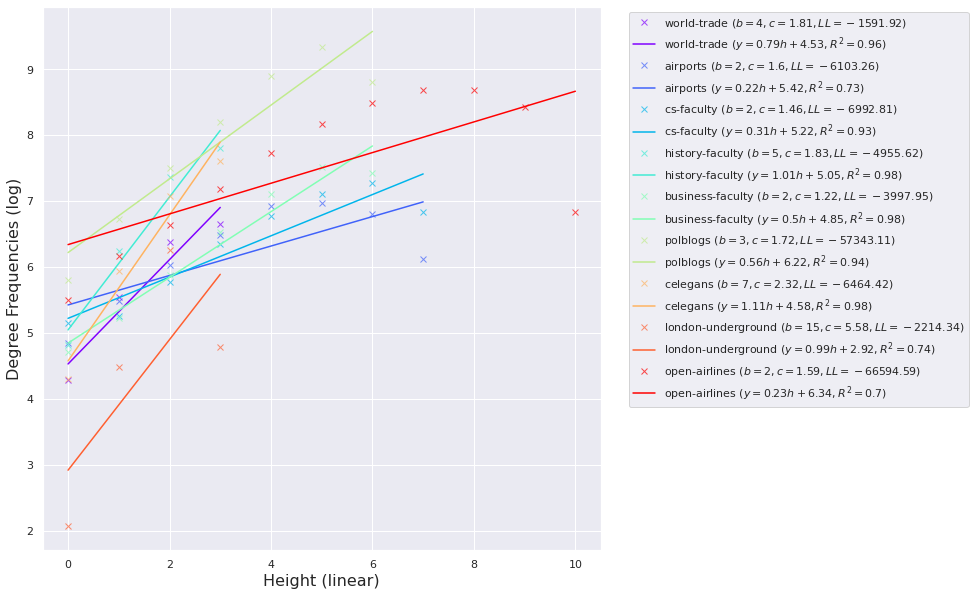

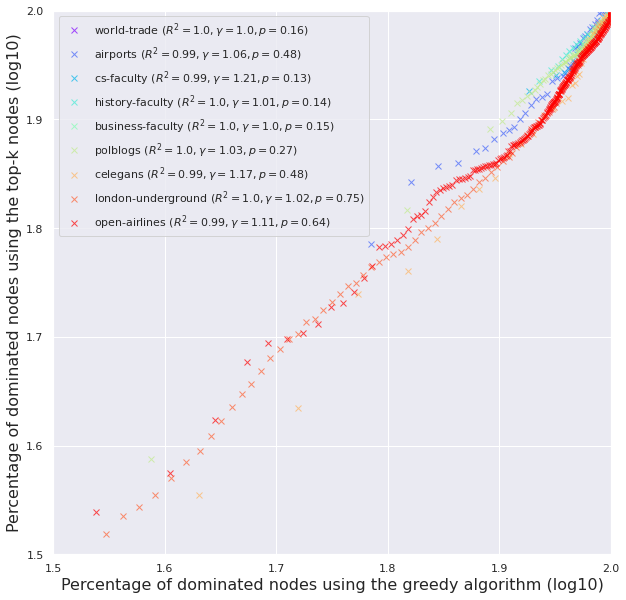

In [ ]:
datasets = [
  (filter_nodes(load_world_trade()), 'world-trade', -1),
  (filter_nodes(load_airports()), 'airports', 20),
  (filter_nodes(load_faculty()), 'cs-faculty', -1),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/History_edgelist.txt')), 'history-faculty', -1),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/Business_edgelist.txt')), 'business-faculty', -1),
  (filter_nodes(load_polblogs()), 'polblogs', 20),
  (filter_nodes(load_celegans()), 'celegans', -1),
  (load_london_underground(), 'london-underground', -1),
  (filter_nodes(load_open_airlines()), 'open-airlines', 5)
]
    
fit_datasets(datasets)


## Simple Version

We present a simpler (**different than the one presented in the paper**) version of the IGAM model to get intuition. More specifically, the model starts with the same tree of height $H$ and fanout $b$. The last level of the tree contains $n_P = b^H$ nodes and for each leaf node $u$ is connected with an internal node $v$ of height $h(v) = h$ with probability $$f(u, v) = c^{-1-h}$$ where $1 < c < b$.

Finally, we delete the edges of the tree skeleton, as we do in the general case of IGAM. We plot a version of the model for $b = 2$ and $c = 1.5$. 

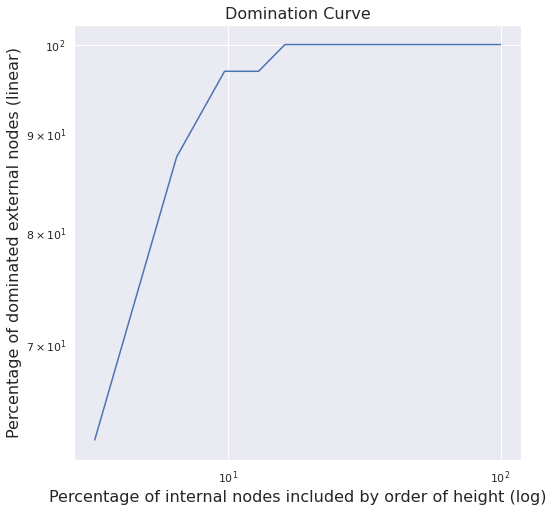

<Figure size 432x288 with 0 Axes>

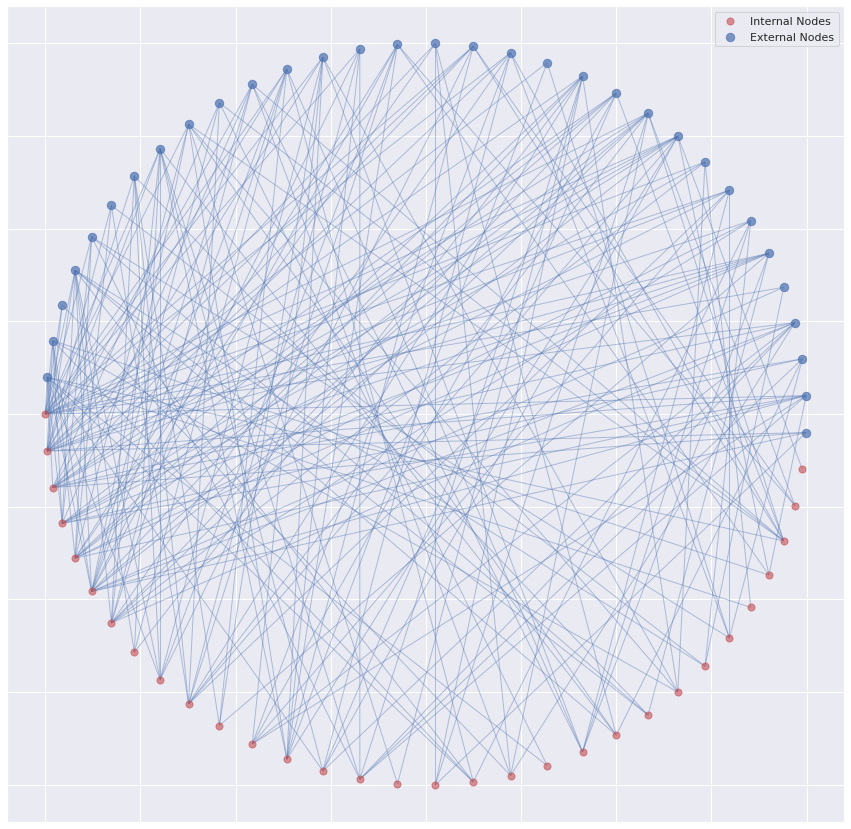

In [ ]:
def generate_simple_igam(H=5, b=2, c=1.5):
  G = nx.generators.classic.balanced_tree(r=b, h=H)
  tree_edges = list(G.edges())
  n_i = b**H
  black = collections.defaultdict(bool)
  x_axis, y_axis = [], []
  edges_int = G.edges()
  edges_rnd = []

  for counter in range(n_i - 1):
    h = np.floor(np.log(counter + 1) / np.log(b))
    for child in range(b**(H) - 1, b**(H + 1) - 1):
      un = np.random.uniform(low=0, high=1)
      if un <= c**(-h-1):
        G.add_edge(counter, child)
        edges_rnd.append((counter, child))
        black[child] = True
    x_axis.append((counter + 1))
    y_axis.append(len(black))

  G.remove_edges_from(tree_edges)

  x_axis = np.array(x_axis)
  y_axis = np.array(y_axis)

  x_axis = x_axis / x_axis[-1] * 100
  y_axis = y_axis / y_axis[-1] * 100

  return G, x_axis, y_axis, H, b, c, n_i

def plot_simple_igam(G, x_axis, y_axis, H, b, c, n_i, suffix=''):

  plt.figure(figsize=(8, 8))
  plt.title('Domination Curve')
  plt.ylabel('Percentage of dominated external nodes (linear)')
  plt.xlabel('Percentage of internal nodes included by order of height (log)')
  plt.loglog(x_axis, y_axis)
  plt.savefig('iga_curve{}.jpg'.format(suffix), dpi=1200)
  plt.figure()
  degrees = np.array([G.degree(u) for u in G])

  fig, ax = plt.subplots(1, 1, figsize=(15, 15))
  pos = nx.shell_layout(G)
  nx.draw_networkx_nodes(G, nodelist=list(range(n_i - 1)), ax=ax, pos=pos, node_color='r', node_size=50, alpha=0.6, label='Internal Nodes')
  nx.draw_networkx_nodes(G, nodelist=list(range(b**(H) - 1, b**(H + 1) - 1)), ax=ax, pos=pos, node_color='b', node_size=70, alpha=0.7, label='External Nodes')
  nx.draw_networkx_edges(G, edgelist=G.edges(), edge_color='b', pos=pos, alpha=0.4)
  plt.legend()
  plt.savefig('iga{}.png'.format(suffix), dpi=1200)

G, x_axis, y_axis, H, b, c, n_i = generate_simple_igam()
plot_simple_igam(G, x_axis, y_axis, H, b, c, n_i)  

## Comparisons

### Logistic Models of Jia & Benson, and Tudisco & Higham

We compare with the logistic core-periphery model from Jia and Benson (2019) and Tudisco and Higham (2018)

The first model is based on a edge creation law of the form

$$g(u, v) = \frac {\exp(\theta_u + \theta_v)} {1 + \exp(\theta_u + \theta_v)}$$

 where $\theta_u$ are the coreness scores of each node. If the combined core score $\theta_u + \theta_v$ increases then the more likely it is for the nodes to be at the core. We also compare with the spatial version of the logistic model presented [here](https://arxiv.org/pdf/1808.06544.pdf). The law is 

 $$g(u, v) = \frac {\exp(\theta_u + \theta_v)} {\exp(\theta_u + \theta_v) + K(u, v)^\varepsilon}$$

 where $K(u, v)$ is a distance kernel (e.g. $K(u, v) = \| x_u - x_v \|_2$). 

 The second model is created by a law of the form

 $$\phi(u, v) = \sigma_{s, t} \left ( \frac 1 n \max \{\pi(u), \pi(v) \} \right )$$

 where $\sigma_{s, t} = \frac {1} {1 + \exp(-s(x - t))}$ and $\pi : V \to V$ is a permutation (ranking) of the nodes where a large $\pi(u)$ indicates a node having a high coreness. The method described in [this paper](https://epubs.siam.org/doi/pdf/10.1137/18M1183558) uses an iterative method which infers a score $x_u > 0$ for each node, and then the permutation $\pi$ is deduced by sorting the nodes in order of their scores. 

In [ ]:
!pip install haversine --quiet

In [ ]:
from scipy.optimize import minimize
import os
import haversine
import copy

def logistic_cp_fit_naive(G, spatial=False, geographical=False):
  n = len(G)
  G = nx.convert_node_labels_to_integers(G)

  def sigmoid(x, dist=0, eps=0):
    return np.exp(x) / (dist**eps + np.exp(x))

  def negative_log_likelihood(x, G, spatial, geographical=False):
    result = 0
    
    for u in G:
      for v in G:
        if spatial:
          if geographical:
            dist = haversine.haversine(G.nodes[u].get('location', np.array([0, 0])), G.nodes[v].get('location', np.array([0, 0])))
          else:
            dist = np.linalg.norm(G.nodes[u].get('location', np.array([0, 0])) - G.nodes[v].get('location', np.array([0, 0])))
        else:
          dist = 1

        if G.has_edge(u, v):
          if spatial:
            result += np.log(sigmoid(x[u] + x[v], dist, x[-1]))
          else:
            result += np.log(sigmoid(x[u] + x[v], dist, 1))
        else:
          if spatial:
            result += np.log(1 - sigmoid(x[u] + x[v], dist, x[-1]))
          else:
            result += np.log(1 - sigmoid(x[u] + x[v], dist, 1))

      return -result

  nll = lambda x: negative_log_likelihood(x, G, spatial, geographical)

  if spatial:
    theta = np.zeros(shape=n+1)
  else:
    theta = np.zeros(shape=n)

  try:
    res = minimize(nll, theta, method='BFGS',
                 options={'maxiter': 10000, 'gtol' : 1e-4, 'disp': False})
  except:
    res = minimize(nll, theta, method='nelder-mead',
                 options={'xatol': 1e-4, 'disp': False})
    
  theta = res.x[:n]

  ranks = np.argsort(theta)[::-1]
  theta = theta[ranks]
  S, x_axis, y_axis = dominating_set(G, method='permutation', permutation=ranks.tolist())

  return S, x_axis, y_axis

def nonlinear_spectral_method(G, alpha=10, p=20):

  def sigmoid(x, s=10, t=0.5):
    return 1 / (1 + np.exp(- s * (x - t)))

  def log_likelihood(G, ranks):
    result = 0 
    n = len(G)
    for u in G:
      for v in G:
        if G.has_edge(u, v):
          result += np.log(sigmoid(1 / n * max(1 + ranks[u],1 + ranks[v])))
        else:
          result += np.log(1 - sigmoid(1 / n * max(1 + ranks[u], 1 + ranks[v])))

    return result
        
  assert(p > alpha)
  q = p / (p - 1)
  n = len(G)

  def helper(x, G, alpha):
    F = np.zeros_like(x)

    for i in G:
      for j in G.neighbors(i):
        F[i] += np.abs(x[i])**(alpha - 2) * x[i] * (x[i]**alpha + x[j]**alpha) ** (1 / (alpha) - 1)

    return F

  x = np.ones(shape=n)
  y = np.ones(shape=n)
  x_prev = x
  for i in range(100):
    y = helper(x, G, alpha)
    x = np.linalg.norm(y, q)**(q - 1) * np.abs(y)**(q - 2) * y
    if np.allclose(x, x_prev):
      break
    else:
      x_prev = x

  ranks = np.argsort(-x)[::-1]

  S, x_axis, y_axis = dominating_set(G, method='permutation', permutation=ranks.tolist())

  return S, x_axis, y_axis

def plot_competitors(datasets):
  plt.figure(figsize=(10, 10))
  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, _, spatial, geographical in datasets:
    G = nx.convert_node_labels_to_integers(G)
    _, x_axis_spectral, y_axis_spectral = nonlinear_spectral_method(copy.deepcopy(G))
    index = np.where(y_axis_spectral >= 80)
    p = np.log(len(G) * x_axis_spectral[index[0][0]] / 100) / np.log(len(G))  
    print('Name: {}, Exponent at >= 80% domination: {}'.format(name, p))
    c = next(colors)
    plt.plot(x_axis_spectral, y_axis_spectral, color=c, label='{} ($p = {}$)'.format(name, round(p, 2)))

  plt.ylabel('Percentage of nodes covered')
  plt.xlabel('Percentage of nodes included via the Tudisco & Higham (2018) Method')

  plt.legend()

  plt.savefig('domination_curve_tudisco_higham.eps')

  plt.figure(figsize=(10, 10))
  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, _, spatial, geographical in datasets:
    G = nx.convert_node_labels_to_integers(G)
    _, x_axis_spectral, y_axis_spectral = logistic_cp_fit_naive(copy.deepcopy(G), spatial, geographical)
    index = np.where(y_axis_spectral >= 80)
    p = np.log(len(G) * x_axis_spectral[index[0][0]] / 100) / np.log(len(G))  
    print('Name: {}, Exponent at >= 80% domination: {}'.format(name, p))
    c = next(colors)
    plt.plot(x_axis_spectral, y_axis_spectral, color=c, label='{} ($p = {}$)'.format(name, round(p, 2)))

  plt.ylabel('Percentage of nodes covered')
  plt.xlabel('Percentage of nodes included via the Jia & Benson (2019) Method')

  plt.legend()

  plt.savefig('domination_curve_jia_benson.eps')


Name: world-trade, Exponent at >= 80% domination: 0.703003902226437
Name: airports, Exponent at >= 80% domination: 0.8074436672039387
Name: celegans, Exponent at >= 80% domination: 0.690434694094514
Name: london-underground, Exponent at >= 80% domination: 0.8336775294637192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in multiply


Name: open-arilines, Exponent at >= 80% domination: 0.8476721840513931
Name: cs-faculty, Exponent at >= 80% domination: 0.6679206079686681
Name: history-faculty, Exponent at >= 80% domination: 0.6695565169123339
Name: business-faculty, Exponent at >= 80% domination: 0.5425722313935701


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Name: polblogs, Exponent at >= 80% domination: 0.8122369237578845
Name: world-trade, Exponent at >= 80% domination: 0.16005307325482132
Name: airports, Exponent at >= 80% domination: 0.7389497398140513
Name: celegans, Exponent at >= 80% domination: 0.6690717562423997
Name: london-underground, Exponent at >= 80% domination: 0.8073589315144238
Name: open-arilines, Exponent at >= 80% domination: 0.7910894359614229
Name: cs-faculty, Exponent at >= 80% domination: 0.4668235940805453
Name: history-faculty, Exponent at >= 80% domination: 0.5153881019590173
Name: business-faculty, Exponent at >= 80% domination: 0.14662371845531105


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Name: polblogs, Exponent at >= 80% domination: 0.6584059706127124


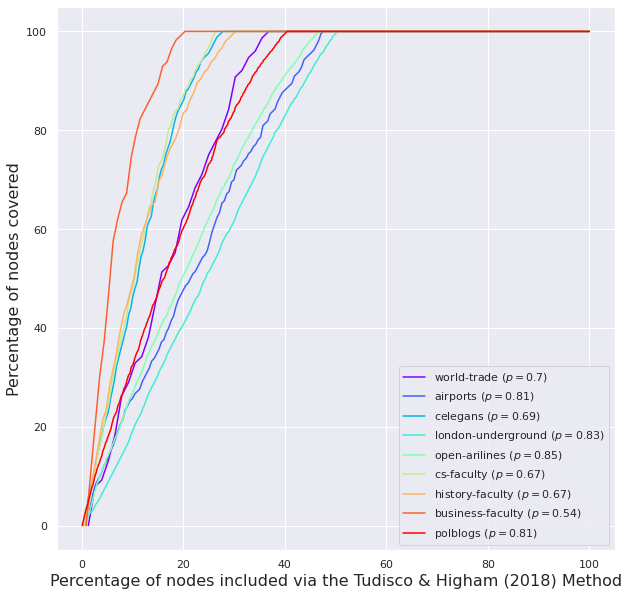

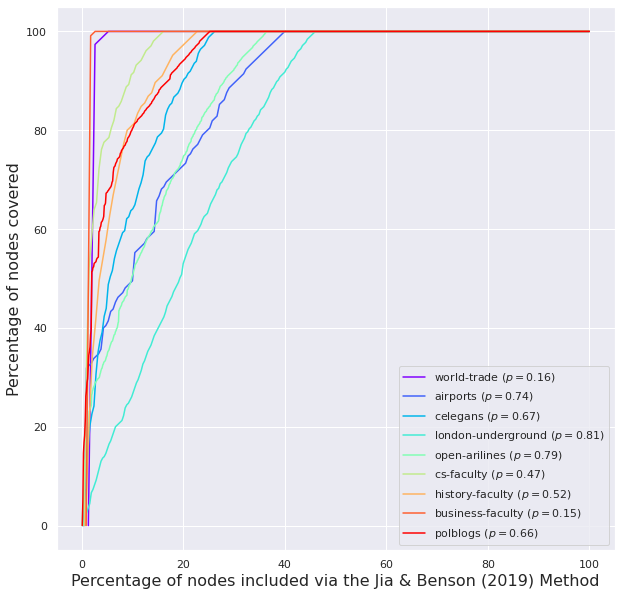

In [ ]:
datasets = [
  (filter_nodes(load_world_trade()), 'world-trade', -1, False, False),
  (filter_nodes(load_airports()), 'airports', 20, False, False),
  (filter_nodes(load_celegans()), 'celegans', -1, False, False),
  (load_london_underground(), 'london-underground', -1, False, False),
  (filter_nodes(load_open_airlines()), 'open-arilines', -1, False, True),
  (filter_nodes(load_faculty()), 'cs-faculty', -1, False, False),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/History_edgelist.txt')), 'history-faculty', -1, False, False),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/Business_edgelist.txt')), 'business-faculty', -1, False, False),
  (filter_nodes(load_polblogs()), 'polblogs', 20, False, False)
]
    
plot_competitors(datasets)

## Visualize Results

We visualize the results on the C. Elegans network for IGAM vs. the logistic methods and the maximum coverage algorithm for a set of size $n^{0.7}$. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


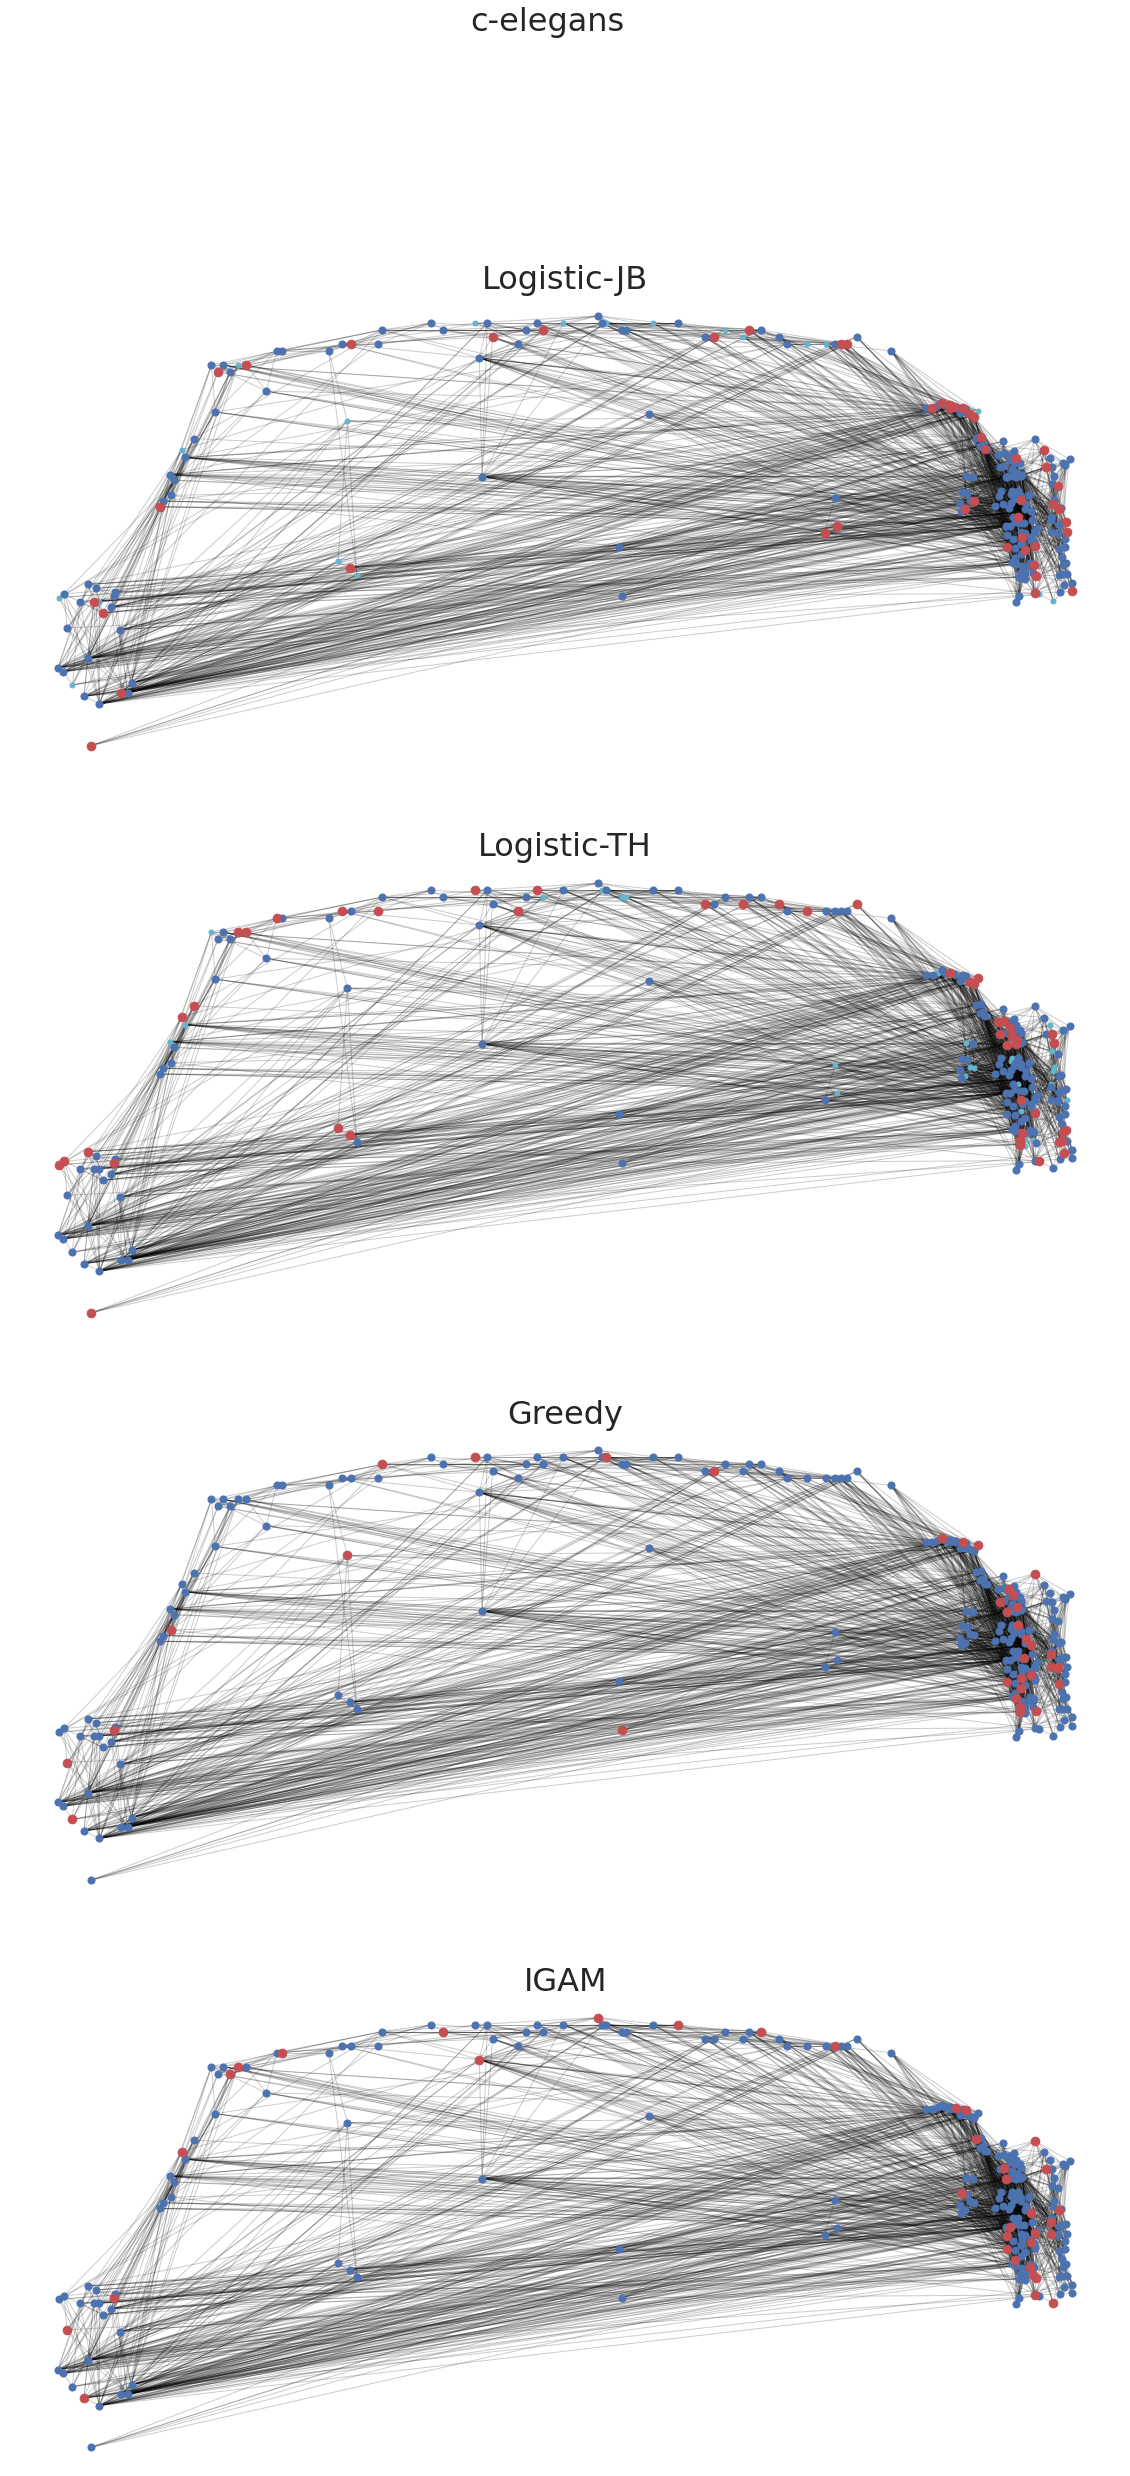

In [ ]:
def visualize_network_helper(G, sets, title): 

  fig, axs = plt.subplots(len(sets), 1, figsize=(20, len(sets) * 10))

  # plt.figure()
  
  for i, (S, name) in enumerate(sets):
    plt.sca(axs[i])
      
    S = set(S)
    V = set(G.nodes())
    W = set()

    for u in S:
      for v in G.neighbors(u):
        if not(v in S):
          W |= {v}
    
    pos = nx.get_node_attributes(G, 'location')

    nx.draw_networkx_edges(G, pos, edge_color='black', nodelist=G.nodes(), alpha=0.2)
    
    
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(V - (S | W)),
        node_size=25,
        node_color='c',
    )

    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(W),
        node_size=50,
        node_color='b',
    )

    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(S),
        node_size=75,
        node_color='r',
    )
    # plt.xlim(-0.05, 1.05)
    # plt.ylim(-0.05, 1.05)
    plt.axis("off")
    axs[i].set_title(name)

  plt.suptitle(title, fontsize=32)

  plt.savefig('visualization.jpg')

def visualize_network(G, title, cutoff=0.7):
  sets = []

  plt.rc('axes', labelsize=32)
  plt.rc('axes', titlesize=32)

  G = nx.convert_node_labels_to_integers(G)

  t = int(len(G)**cutoff)

  S_logistic_cp, _, _ = logistic_cp_fit_naive(copy.deepcopy(G), True, False)
  sets.append((S_logistic_cp[:t], 'Logistic-JB'))
  S_nonlinear, _, _ = nonlinear_spectral_method(copy.deepcopy(G))
  sets.append((S_nonlinear[:t], 'Logistic-TH'))
  S_greedy, _, _ = dominating_set(copy.deepcopy(G), method='greedy')
  sets.append((S_greedy[:t], 'Greedy'))
  S_topk, _, _ = dominating_set(copy.deepcopy(G), method='topk')
  sets.append((S_topk[:t], 'IGAM'))
  visualize_network_helper(G, sets, title)

visualize_network(filter_nodes(load_celegans()), 'c-elegans')

We visualize the hierarchy implied by IGAM on small datasets. Spatial networks are visualized according to their positions and non-spatial networks are visualized in a shell layout.

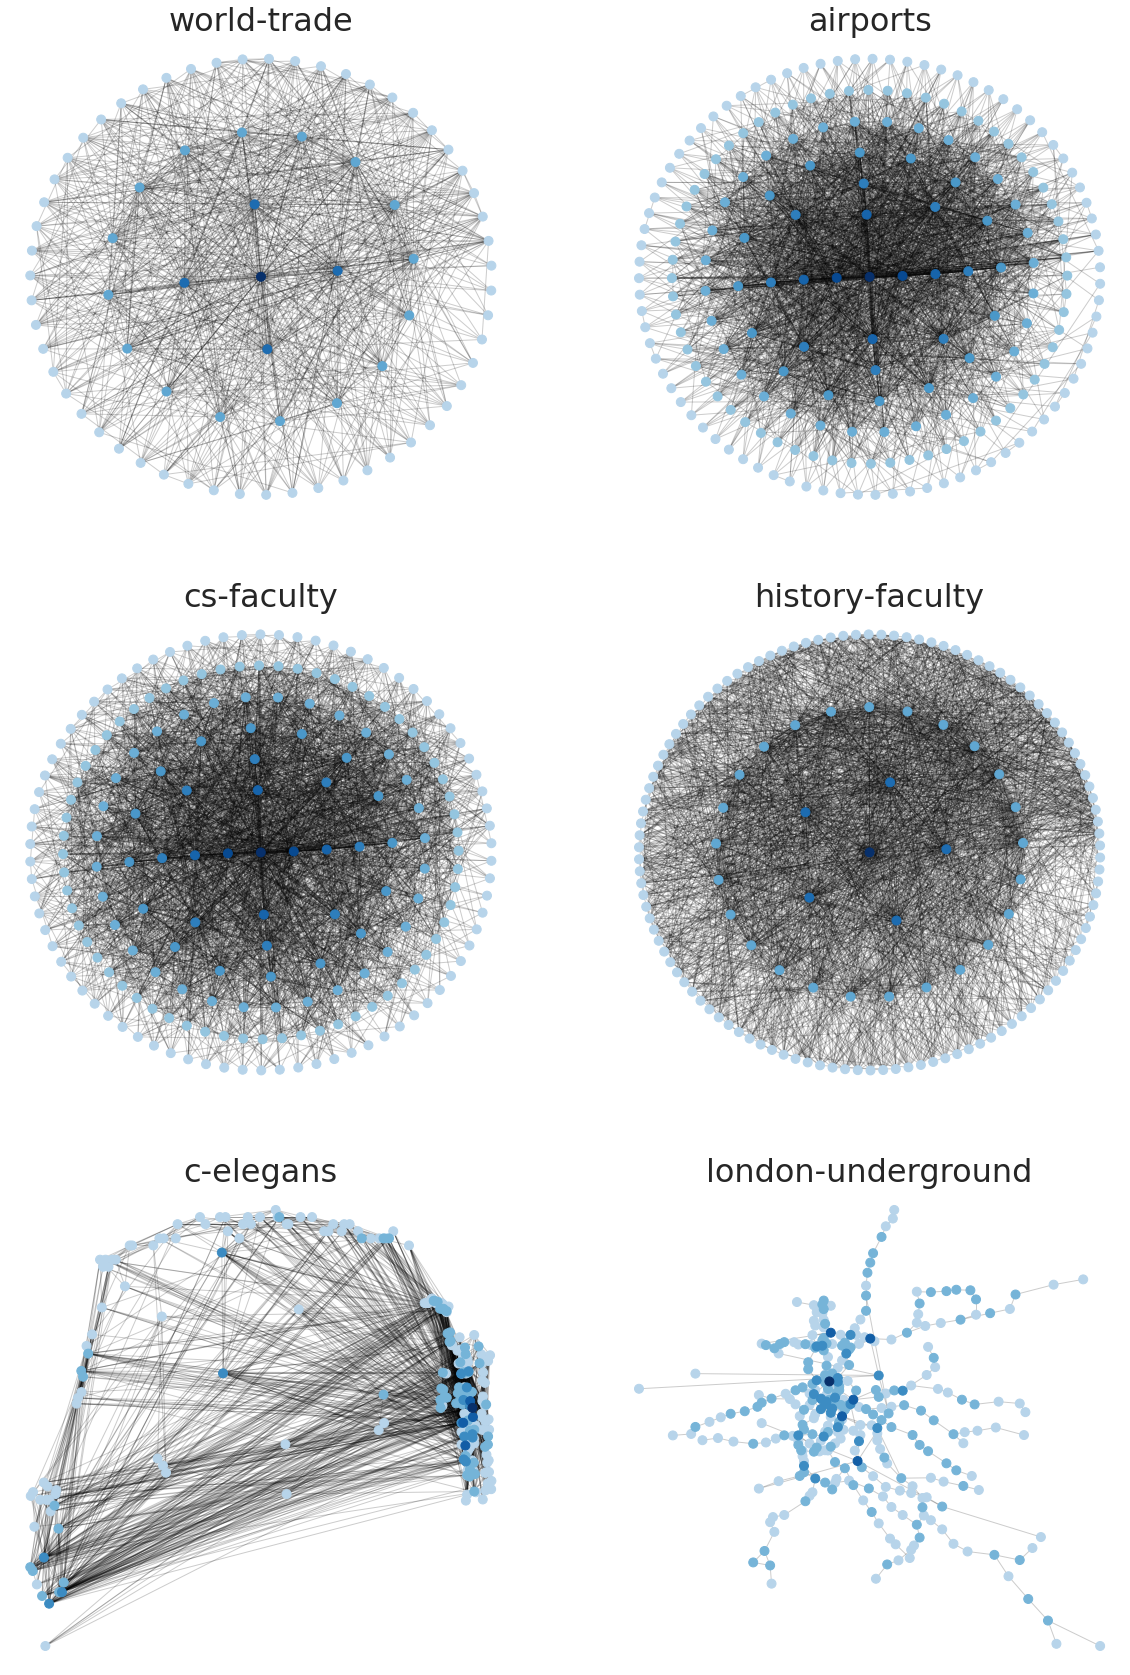

In [ ]:
import matplotlib

def visualize_networks_igam_fit(datasets):

  fig, axs = plt.subplots(len(datasets) // 2, 2, figsize=(2 * 10, len(datasets) // 2 * 10))

  plt.rc('axes', labelsize=32)
  plt.rc('axes', titlesize=32)

  for i, (G, name, max_iters, spatial) in enumerate(datasets):

    G = nx.convert_node_labels_to_integers(G, label_attribute='name')

    plt.sca(axs[i // 2, i % 2])

    argmax_ll, _ = igam_fit(G, max_iters=max_iters)

    _, _, h, heights = argmax_ll

    min_val, max_val = 0,0.7
    orig_cmap = plt.cm.Blues_r
    colors = orig_cmap(np.linspace(min_val, max_val, len(heights)))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

    plt.rc('axes', labelsize=32)
    plt.rc('axes', titlesize=32)
    
      
    if spatial:
      pos = nx.get_node_attributes(G, 'location')
    else:
      temp = collections.defaultdict(list)

      for key, val in heights.items():
        temp[val].append(key)

      shells = [temp[key] for key in sorted(heights.keys())]
      pos = nx.shell_layout(G, shells)


    nx.draw_networkx_edges(G, pos, edge_color='black', nodelist=G.nodes(), alpha=0.2)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(reversed(list(heights.keys()))),
        node_size=80,
        node_color=list(reversed(list(heights.values()))),
        cmap=cmap,
    )
    
    plt.axis("off")

    axs[i // 2, i % 2].set_title(name)

  plt.savefig('visualization_igam_fit.jpg')

datasets = [
  (filter_nodes(load_world_trade()), 'world-trade', -1, False),
  (filter_nodes(load_airports()), 'airports', 20, False),
  (filter_nodes(load_faculty()), 'cs-faculty', 5, False),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/History_edgelist.txt')), 'history-faculty', 5, False),
  # (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/Business_edgelist.txt')), 'business-faculty', 5, False),
  (filter_nodes(load_celegans()), 'c-elegans', 5, True),
  (load_london_underground(), 'london-underground', 5, True),
]

visualize_networks_igam_fit(datasets)

## Qualitative analysis 

Below we print all the structure of the first 3 levels of the core for all labeled datasets.

In [ ]:
def qualitative_analysis(datasets, max_height=3):
  for G, name, max_iters in datasets:
    print('{}: '.format(name), end='')
    argmax_ll, _ = igam_fit(G, max_iters=max_iters)
    _, _, _, heights = argmax_ll

    levels = collections.defaultdict(list)

    for key, val in heights.items():
      if val < max_height:
        levels[val].append(G.nodes[key].get('name', key))

    for key, val in levels.items(): 
      print('({})'.format(', '.join(val)), end='')

    print()

datasets = [
  (load_world_trade(),  'world-trade', -1),
  (load_london_underground(), 'london-underground', 4),
  (filter_nodes(load_open_airlines()), 'open-arilines', 3),
  (filter_nodes(load_faculty()), 'cs-faculty', -1),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/History_edgelist.txt')), 'history-faculty', -1),
  (filter_nodes(load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/Business_edgelist.txt')), 'business-faculty', -1),
]

qualitative_analysis(datasets)

world-trade: (Finland)(Hungary, Slovenia, Singapore, Chile)(Salvador, Iceland, Kuwait, Rep., Belgium, Poland, Moldava., Austria, Germany, Indonesia, Guatemala, Bolivia, Paraguay, Australia, Africa, Of)
london-underground: (Bank)(Baker Street, Canning Town)(Kings Cross St. Pancras, Stratford, Willesden Junction, Earls Court)
open-arilines: (AMS)(FRA, CDG)(IST, MUC, ATL, PEK)
cs-faculty: (All others)(University of Illinois, Urbana Champaign, MIT)(Purdue University, University of Texas, Austin, Carnegie Mellon University, Stanford University)
history-faculty: (All others)(Harvard University, Yale University, University of Chicago, University of Wisconsin, Madison, Columbia University)(UC Berkeley, UCLA, Princeton University, University of Michigan, University of Pennsylvania, Stanford University, Johns Hopkins University, Rutgers University, University of Virginia, Cornell University, University of Texas, Austin, New York University, Indiana University, Northwestern University, Ohio State

## Engagement 

We plot the exponent of an 0.7-ADS using various thresholds to filter the nodes.


In [ ]:
plt.rc('axes', labelsize=LARGE_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

def visualize_engagement_threshold(datasets, method, dmax=5, target=70):

  plt.figure(figsize=(10, 10))
  plt.xlabel('Engagement Threshold')
  plt.ylabel('Exponent $p$ for a {}-ADS'.format(round(target / 100, 2)))

  for i, (G, name, max_iter, spatial) in enumerate(datasets):
    print(name)
    temp_x = []
    temp_y = []

    for d in range(0, dmax + 1):
      H = copy.deepcopy(G)
      H = nx.convert_node_labels_to_integers(filter_nodes(H, threshold=d))
      n = len(H)
      if len(H) <= 1:
        break
      else:
        if method == 'Logistic-JB':
          _, x_axis, y_axis = logistic_cp_fit_naive(H, True, False)
        elif method == 'Logistic-TH':
          _, x_axis, y_axis = nonlinear_spectral_method(H)
        elif method == 'Greedy':
          _, x_axis, y_axis = dominating_set(H, method='greedy')
        elif method == 'IGAM':
          _, x_axis, y_axis = dominating_set(H, method='topk')
        index = np.where(y_axis >= target)[0][0]
        p = np.log(n * x_axis[index] / 100) / np.log(n)
        temp_y.append(p)
        temp_x.append(d)

    plt.plot(temp_x, temp_y, marker='x', label=name)
  plt.title(method)    
  plt.legend()
  plt.savefig('engagement_{}.eps'.format(method))

world-trade
airports
cs-faculty
history-faculty
business-faculty
polblogs
celegans
london-underground
open-airlines


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


world-trade
airports
cs-faculty
history-faculty
business-faculty
polblogs
celegans
london-underground
open-airlines


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


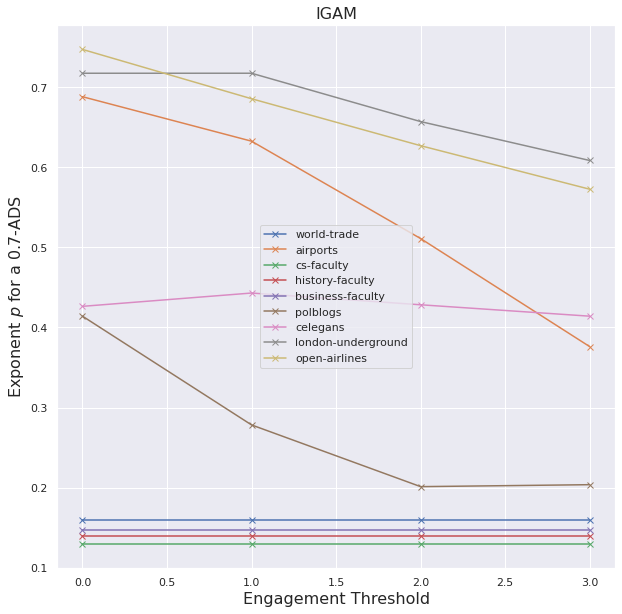

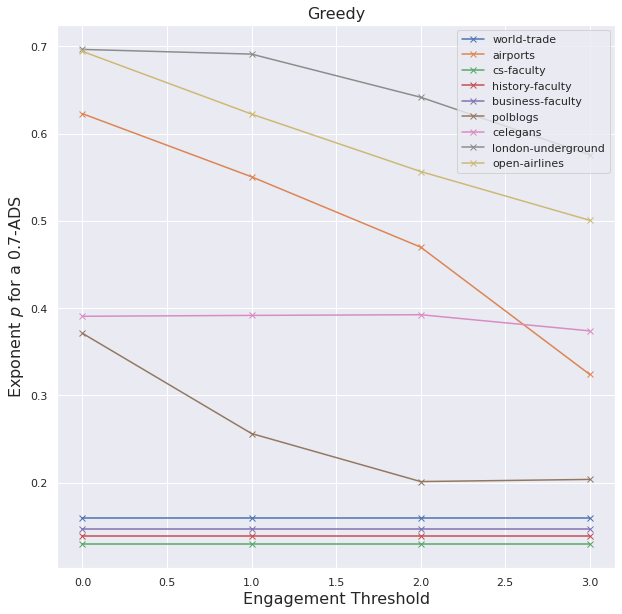

In [ ]:
datasets = [
  (load_world_trade(), 'world-trade', -1, False),
  (load_airports(), 'airports', 20, False),
  (load_faculty(), 'cs-faculty', -1, False),
  (load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/History_edgelist.txt'), 'history-faculty', -1, False),
  (load_faculty(location='/content/drive/My Drive/NNIM/data/faculty/Business_edgelist.txt'), 'business-faculty', -1, False),
  (load_polblogs(), 'polblogs', 20, False),
  (load_celegans(), 'celegans', -1, True),
  (load_london_underground(), 'london-underground', -1, True),
  (load_open_airlines(), 'open-airlines', 5, True)
]

for method in ['IGAM', 'Greedy']:
  visualize_engagement_threshold(datasets, method=method, dmax=3)

## Continuous model

In the *continuous* version of IGAM the height of a node $v$ is allowed to be any real number $h(v) \in [0, H]$ and the edge creation law remain the same as the simple version of IGAM. Moreover, similarly to Tudisco and Higham the edge creation law $f(u, v)$ can be approximated by the limit as $\delta \to - \infty$ of a law $f_{\delta}(u, v)$ that involves the generalized mean of $h(u)$ and $h(v)$, i.e. 

$$
    f_\delta(u, v) = c^{-1- \left ( \frac {h^\delta(u) + h^\delta (v)} {2} \right )^{1 / \delta}}. 
$$

The model given by the previous equation can be treated as the scale-free version of the logistic model of the model of Tudisco and Higham where the inverse ranking is replaced by the height function. The network has $n = b^H - 1$ nodes. If the heights $h$ are drawn independently from a distribution with Cummulative Density Function (CDF) equal to 

\begin{equation*}
    \Pr [h(v) \le t] = \begin{cases}
        0 & t < 0 \\
        \frac {b^t - 1} {b^H - 1} & t \in [0, H] \\
        1 & t > H
    \end{cases},
\end{equation*}

then we can easily show that the continuous model has a sublinear dominating set. 

Below we define the fitting procedure as well as the generation procedure. 



In [ ]:
def sample_height(b, H):
  u = np.random.uniform()
  return np.log((b**H - 1) * u + 1) / np.log(b)

def generate_continuous_igam(b, c1, c2, H0, H):
  n = b**H - 1
  G = nx.Graph()
  h = {}
  for u in range(n):
    h[u] = sample_height(b, H)
  
  for u in range(n):
    for v in range(n):
      if u != v:
        y = np.random.uniform()
        if max(h[u], h[v]) <= H0:
          f = c1**(- 1 - min(h[u], h[v]))
        else:
          f = c2**(- 1 - min(h[u], h[v]))
        if y <= f:
          G.add_edge(u, v)

  return G

def continuous_igam_fit_naive(G, spatial=False, geographical=False):
  n = len(G)
  G = nx.convert_node_labels_to_integers(G)

  def law(c, hu, hv):
    return np.power(c, -1 - min(hu, hv))

  def negative_log_likelihood(x, G):
    result = 0
    
    for u in G:
      for v in G:
        if G.has_edge(u, v):
          result += np.log(law(x[-1], x[u], x[v]))
        elif u != v:
          result += np.log(1 - law(x[-1], x[u], x[v]))

      return -result

  nll = lambda x: negative_log_likelihood(x, G)

  theta = np.zeros(shape=(n + 1))
  theta[-1] = 2

  bounds = []

  for i in range(n+1):
    bounds.append((float(i == n), None))

  constraints = []

  for i in range(n+1):
    constraints.append({'type': 'ineq', 'fun': lambda x:  x[i]})

  res = minimize(nll, theta, method='SLSQP', constraints=tuple(constraints), bounds=tuple(bounds),
                 options={'maxiter': 1000, 'gtol' : 1e-4, 'disp': False})
  
    
  theta = res.x
  obj = -res.fun

  ranks = np.argsort(theta)[::-1]
  theta = theta[ranks]
  S, x_axis, y_axis = dominating_set(G, method='permutation', permutation=ranks.tolist())

  return S, x_axis, y_axis
